# US Covid Hospitalization Time-Series Prediction - LinearRegression

## Importing Packages

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Reading Dataset

In [28]:
data = np.genfromtxt('hospitalizations.txt', delimiter=' ')

## Data PreProcessing

In [29]:
hosp = data[:,1]

## Exploratory Data Analysis

### Trend of US Covid Hospitalization Data

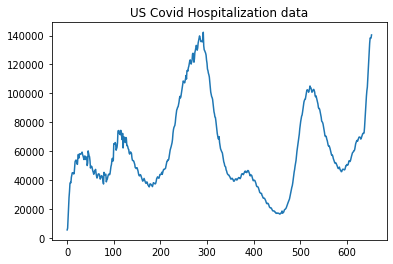

In [30]:
plt.plot(hosp)
plt.title('US Covid Hospitalization data')
plt.show()

## Defining Parameters for the model

In [31]:
last = len(hosp)
win = 20 # input size or window size
m = 50 # data period and number of data points

## Training

### Defining Training Data

In [32]:
## Defining starting point for the training set
trainbegin = np.random.randint(400)
## Defining and adding an initial training trend (datapoint) to the features and regressor set
Xtrain = np.array(hosp[trainbegin:trainbegin+win])
ytrain = np.array(hosp[trainbegin+win])
## Adding trends equivalent to window size, to the training set
for i in range(1, m):
    Xtrain = np.vstack([Xtrain, hosp[trainbegin+i:trainbegin+i+win]])
    ytrain = np.append(ytrain, hosp[trainbegin+i+win])

### Training the Model with Time-Series Data

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain)
ypred = lin_reg.predict(Xtrain)

### Printing Mean Error on training set

In [44]:
print('Mean Training Error:', np.sqrt(mean_squared_error(ytrain, ypred)))

Mean Training Error: 41357.225486056785


### Plotting comparison of the Training dataset Trend and Predicted Trend

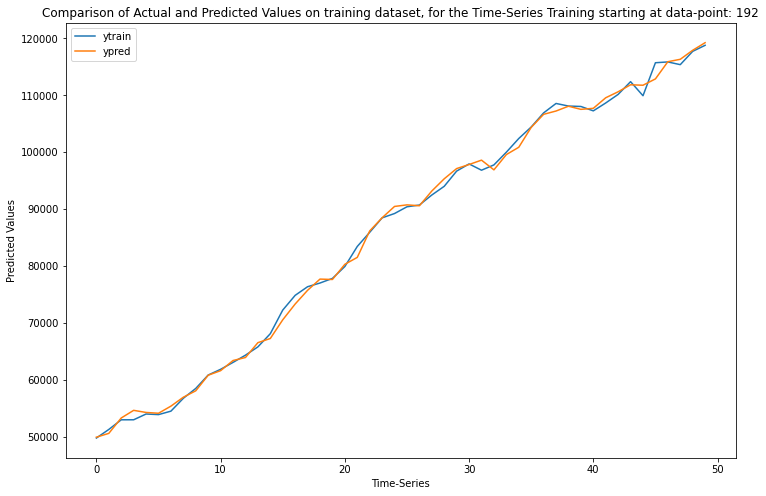

In [35]:
plt.figure(figsize=(12,8))
plt.plot(ytrain)
plt.plot(ypred)
plt.xlabel("Time-Series")
plt.ylabel("Predicted Values")
plt.legend(['ytrain','ypred'])
plt.title('Comparison of Actual and Predicted Values on training dataset, for the Time-Series Training starting at data-point: ' + str(trainbegin))
plt.show()

## Testing

### Defining Testing Dataset

In [36]:
## Creating Testing dataset
testbegin = trainbegin + m
## Defining and adding an initial testing trend (datapoint) to the features and regressor set
Xtest = np.array(hosp[testbegin:testbegin+win])
ytest = np.array(hosp[testbegin+win])
## Adding trends equivalent to window size, to the training set
for i in range(1, 5):
    Xtest = np.vstack([Xtest, hosp[testbegin+i:testbegin+i+win]])
    ytest = np.append(ytest, hosp[testbegin+i+win])

### Predicting over Testing Dataset

In [37]:
ypred = lin_reg.predict(Xtest)

### Printing Mean Error on testing set

In [38]:
#Printing MSE on Testing Dataset
print('Test Error, immediately after training: ', np.sqrt(mean_squared_error(ytest, ypred)))

Test Error, immediately after training:  2848.9633892374977


### Plotting comparison of the Testing dataset Trend and Predicted Trend

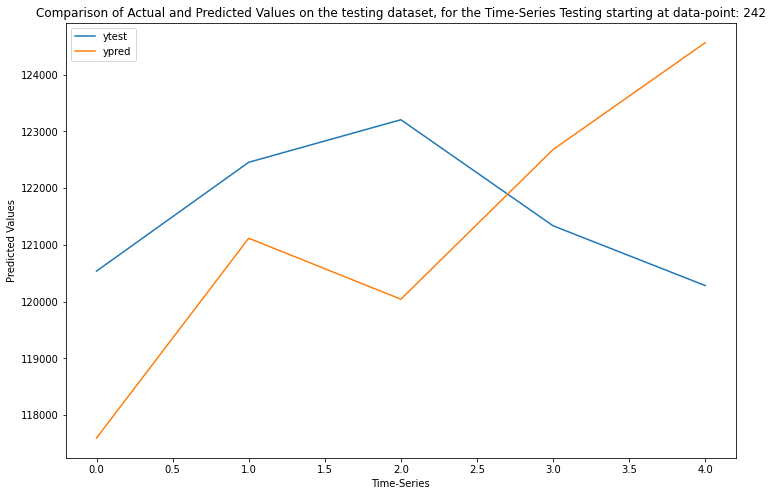

In [39]:
plt.figure(figsize=(12,8))
plt.plot(ytest)
plt.plot(ypred)
plt.xlabel("Time-Series")
plt.ylabel("Predicted Values")
plt.legend(['ytest','ypred'])
plt.title('Comparison of Actual and Predicted Values on the testing dataset, for the Time-Series Testing starting at data-point: ' + str(testbegin))
plt.show()

## Future Testing

### Defining Future Testing Dataset

In [40]:
#Creating Testing dataset for the future predictions
testbegin = np.random.randint(trainbegin + 2 * m, last - win - m)
Xtest = np.array(hosp[testbegin:testbegin+win])
ytest = np.array(hosp[testbegin+win])
for i in range(1, m):
    Xtest = np.vstack([Xtest, hosp[testbegin+i:testbegin+i+win]])
    ytest = np.append(ytest, hosp[testbegin+i+win])

### Predicting over Testing Dataset

In [41]:
ypred = lin_reg.predict(Xtest)

### Printing Mean Error on future testing set

In [42]:
print('test error at a random future:', np.sqrt(mean_squared_error(ytest, ypred)))

test error at a random future: 1732.321591198832


### Plotting comparison of the Future Testing dataset Trend and Predicted Trend

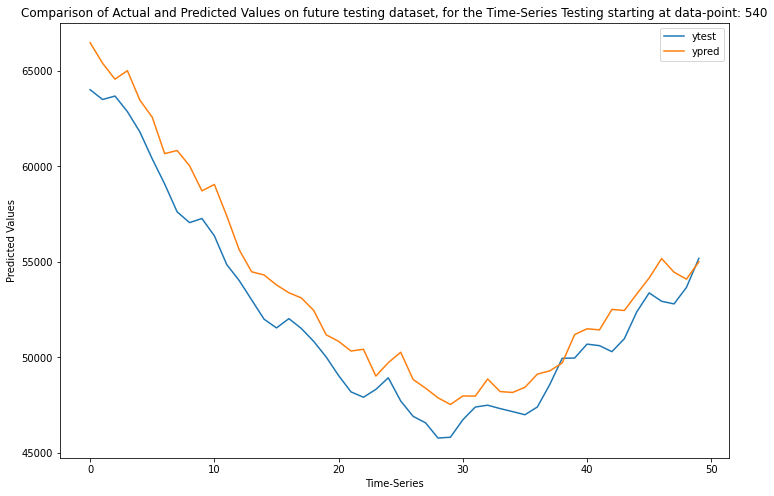

In [43]:
#Plotting comparison of actual and predicted values on the testing dataset
plt.figure(figsize=(12,8))
plt.plot(ytest)
plt.plot(ypred)
plt.xlabel("Time-Series")
plt.ylabel("Predicted Values")
plt.legend(['ytest','ypred'])
plt.title('Comparison of Actual and Predicted Values on future testing dataset, for the Time-Series Testing starting at data-point: ' + str(testbegin))
plt.show()